## This is the second try of numberplate reading model

In [151]:
import cv2
# import pytesseract
import easyocr
import imutils
import numpy as np

from matplotlib import pyplot as plt

In [137]:
# pytesseract.pytesseract.tesseract_cmd = "C:/Program Files/Tesseract-OCR/tesseract.exe"

### Read the image

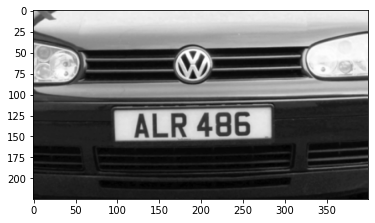

In [138]:
image = cv2.imread("../data/License-plate/images/Cars187.png")
grayImg = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(grayImg,cv2.COLOR_BGR2RGB))

### Smoothing Image

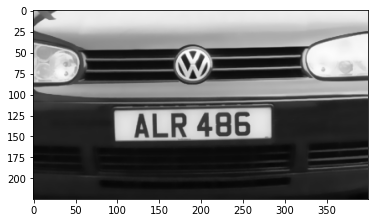

In [139]:
grayImg = cv2.bilateralFilter(grayImg,11,17,17)

plt.imshow(cv2.cvtColor(grayImg,cv2.COLOR_BGR2RGB))

### Finding edges of the picture

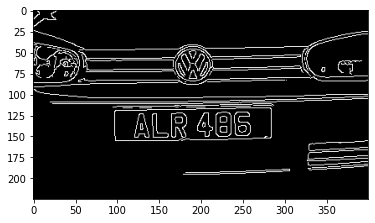

In [140]:
edgeImg = cv2.Canny(grayImg,30,200)

plt.imshow(cv2.cvtColor(edgeImg,cv2.COLOR_BGR2RGB))

### Finding the contour

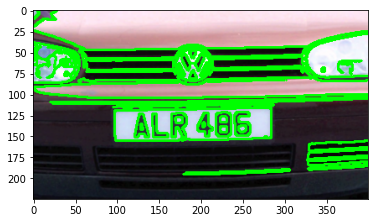

In [141]:
contour1, hierarchy1 = cv2.findContours(edgeImg,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
image1 = image.copy()
#drawing contour
cv2.drawContours(image1,contour1,-1,(0,255,0),2)

plt.imshow(image1)

### Filtering the contour

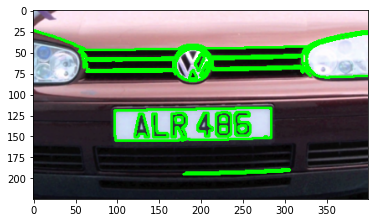

In [142]:
contour2 = sorted(contour1,key=cv2.contourArea,reverse=True)[:30]

image2 = image.copy()
cv2.drawContours(image2,contour2,-1,(0,255,0),2)

plt.imshow(image2)

In [143]:
numberplate = None
name=1
path="../data/numberplate/"

for contour in contour2:
    rectangle = cv2.approxPolyDP(contour,30,True)
    if len(rectangle)==4:
        numberplate = rectangle
        x,y,w,h = cv2.boundingRect(contour)
        croppedImg = image[y:y+h,x:x+w]
        cv2.imwrite(path+str(name)+'.png',croppedImg)
        name +=1
        break

numberplate

array([[[284, 117]],

       [[ 98, 119]],

       [[ 98, 155]],

       [[283, 152]]], dtype=int32)

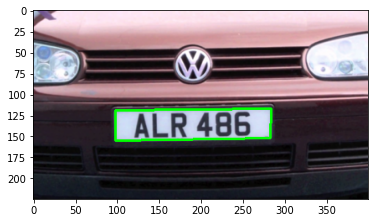

In [144]:
cv2.drawContours(image,[numberplate],-1,(0,255,0),2)
plt.imshow(image)

### Reading the numberplate using pytesseract

In [153]:
# path1="../data/numberplate/1.png"
# Img_text = pytesseract.image_to_string(path1,lang='eng')
#
# print("number is - ",Img_text)

In [152]:
path1="../data/numberplate/1.png"
reader = easyocr.Reader(['en'])
result = reader.readtext(path1)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[19, 0], [169, 0], [169, 40], [19, 40]], 'ALR 486', 0.9254122074307701)]